In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
df = pd.read_csv('Ordinal+Elastic.csv')

In [3]:
df.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Elastic
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,121089.504843
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,132818.571424
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,124620.266080


In [4]:
X_ordinal = df.drop(['SalePrice'], axis=1).values
Y_ordinal = df.SalePrice.values

In [5]:
X_ordinal.shape

(2580, 83)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, Y_train)
XGB_Score = xgb.score(X_test_scaled, Y_test)

In [7]:
XGB_Score

0.9405641589902821

In [8]:
xgb.feature_importances_

array([6.6257373e-04, 5.4854440e-04, 1.0707187e-03, 3.8076544e-03,
       2.2619879e-03, 6.1750191e-04, 3.1590402e-02, 0.0000000e+00,
       7.2062155e-04, 3.4182395e-03, 3.5756892e-03, 2.4848154e-03,
       2.6772570e-04, 1.1540464e-03, 2.2560246e-03, 2.8403993e-03,
       0.0000000e+00, 1.2419113e-03, 1.8421224e-03, 2.1697525e-03,
       4.4315096e-04, 8.8255358e-04, 9.7517576e-04, 1.9968445e-04,
       8.7007286e-04, 1.2315384e-03, 1.2887577e-03, 1.1507636e-03,
       0.0000000e+00, 2.3550098e-03, 3.9824652e-03, 6.6394336e-04,
       2.2378364e-03, 5.7457658e-03, 1.7826734e-03, 8.1118161e-04,
       5.2787957e-04, 4.5380541e-04, 8.4919157e-04, 3.2951849e-04,
       2.4361524e-04, 8.9619693e-04, 1.6468308e-04, 1.1328603e-03,
       9.5659628e-04, 5.5729398e-03, 5.1770229e-03, 1.6899321e-03,
       2.2184141e-03, 3.5441539e-03, 2.2714811e-03, 3.0251555e-03,
       1.3227077e-02, 6.6954670e-03, 3.9985226e-03, 2.2015176e-03,
       3.4007025e-03, 2.8192580e-03, 6.7535118e-04, 1.4067299e

In [9]:
X_cols = df.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('Elastic', 0.7898804),
 ('LandContour', 0.031590402),
 ('OverallQual', 0.013227077),
 ('2ndFlrSF', 0.010038621),
 ('OverallCond', 0.006695467),
 ('Functional', 0.0057457658),
 ('TotalBsmtSF', 0.0056027602),
 ('SaleType', 0.0055729398),
 ('SaleCondition', 0.005177023),
 ('EnclosedPorch', 0.0050205835),
 ('Fireplaces', 0.0044303597),
 ('1stFlrSF', 0.0043129125),
 ('YearBuilt', 0.0039985226),
 ('CentralAir', 0.0039824652),
 ('FullBath', 0.0038718642),
 ('Street', 0.0038076544),
 ('Neighborhood', 0.0035756892),
 ('GrLivArea', 0.0035441539),
 ('LandSlope', 0.0034182395),
 ('MasVnrArea', 0.0034007025),
 ('BsmtHalfBath', 0.0030446667),
 ('LotArea', 0.0030251555),
 ('HalfBath', 0.0029454855),
 ('RoofStyle', 0.0028403993),
 ('BsmtFinSF1', 0.002819258),
 ('KitchenAbvGr', 0.0027446994),
 ('BedroomAbvGr', 0.0026133407),
 ('Condition1', 0.0024848154),
 ('HeatingQC', 0.0023550098),
 ('LotFrontage', 0.002271481),
 ('Alley', 0.002261988),
 ('HouseStyle', 0.0022560246),
 ('GarageYrBlt', 0.0022464087)

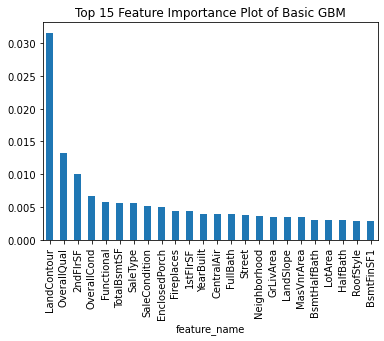

In [10]:
a, b = zip(*sorted_importance[1:25]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [11]:
X_ordinal_scaled = scaler.transform(X_ordinal)
len(X_ordinal_scaled)

2580

In [12]:
predicted_value = xgb.predict(X_ordinal_scaled)

In [13]:
true_value = Y_ordinal

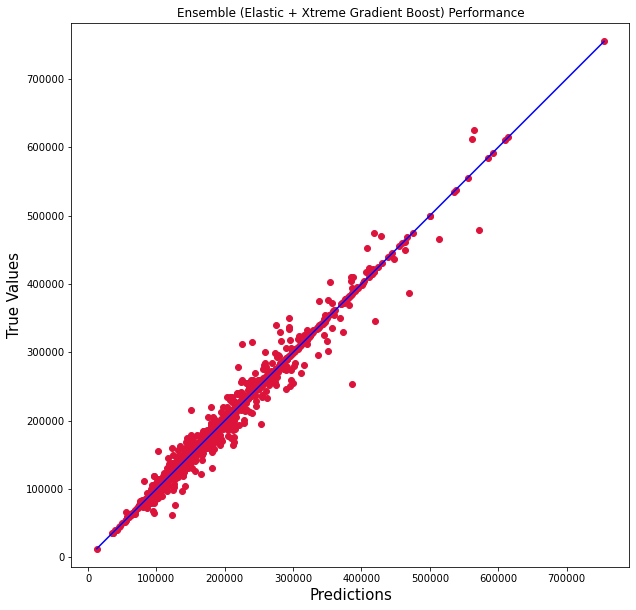

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Ensemble (Elastic + Xtreme Gradient Boost) Performance')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()